# <b>1. Introduction</b>

### <u>Project Overview</u>

Facial keypoint detection is a computer vision task that involves identifying and locating specific points on a person's face, such as the eyes, nose, and mouth. This project aims to develop a reliable neural network model that can accurately detect these facial keypoints in various images. By utilizing advanced machine learning techniques and data augmentation methods, the project seeks to enhance the precision and consistency of facial feature detection. This is important for applications like facial recognition systems, virtual makeup tools, and interactive technologies that respond to facial expressions.

### <u>Problem Statement</u>

While there have been significant advancements in facial keypoint detection, achieving high accuracy and reliability in real-world conditions remains challenging. Current models often struggle with faces showing extreme angles, partial obstructions, or under different lighting conditions. Additionally, the limited availability of diverse annotated data makes it difficult to create models that work well for everyone. This project aims to overcome these issues by developing a top-performing facial keypoint detection model that remains accurate and dependable across a wide range of real-world scenarios.

The main goals of this project are:

- Model Development: Create and implement a deep learning model, preferably using convolutional neural networks, optimized for precise facial keypoint detection.

- Data Augmentation: Apply advanced data augmentation techniques to increase the diversity of the training dataset, helping the model generalize better to new and unseen facial variations.

- Performance Optimization: Fine-tune the model’s settings and use regularization methods to prevent overfitting, ensuring the model performs well on different datasets.

- Evaluation and Validation: Thoroughly assess the model’s performance using both numerical metrics and visual inspections, comparing it with existing benchmarks to demonstrate its effectiveness.

# <b>2. Handling of Training and Inference</b>

## Data Preparation

### <u>Data Preparation:</u>

The project utilizes the Facial Keypoints Detection dataset, which contains images of human faces along with annotated keypoints such as the eyes, nose, and mouth. The dataset is sourced from AFLW and comprises approximately 25000 images. Each image is labeled with 20 keypoints, providing precise locations for facial features. The dataset includes diverse facial expressions, lighting conditions, and angles to ensure the model learns to generalize well across different scenarios.

### <u>Preprocessing Steps:</u>
Before training, the data undergoes several preprocessing steps to ensure consistency and improve model performance:

1. Data Cleaning: Images with missing or corrupted keypoints are removed to maintain data integrity. Remove any images that do not contain the keypoints: left eye center, right eye center, nose center, and mouth center. Remove any images that contain multiple faces.

2. Normalization: Pixel values of the images are scaled to a range of [0, 1] to facilitate faster and more stable training. Similarly, keypoint coordinates are normalized relative to the image dimensions.

3. Data Augmentation: To increase the diversity of the training data, techniques such as rotations, horizontal flips, and brightness adjustments are applied using the Albumentations library. This helps the model become more robust to variations in real-world data.

It might be worth mentioning that in training, I (Asajad), used data augmentation but my other group mates did not. Results will be explained later on.

## Model Architecture:



### <u>Design Choices:</u>

The model is built using a Convolutional Neural Network (CNN) architecture, which is well-suited for image-based tasks. The network consists of multiple convolutional layers followed by pooling layers to extract hierarchical features from the input images. After the convolutional blocks, fully connected layers are used to map the extracted features to the final keypoint coordinates. Dropout layers are included to prevent overfitting by randomly disabling neurons during training.

A CNN was chosen for its proven effectiveness in image recognition and localization tasks. The architecture balances depth and complexity to capture intricate facial features without being overly computationally intensive. Utilizing dropout layers enhances the model's ability to generalize by reducing reliance on specific neurons, thereby improving performance on unseen data.

The model's architecture was highly influence by a network made by the github user nalbert9 found [here](https://github.com/nalbert9/Facial-Keypoint-Detection/blob/master/models.py). 

![Network Architecture](model/network_architecture.png)

## Training Configuration:

### <u>Hyperparameters:</u>
- Learning Rate: Set to 0.0001, it determines the step size during weight updates. A lower learning rate ensures stable convergence.

- Batch Size: Set to 64, it defines the number of samples processed before the model's internal parameters are updated.

- Epochs: The model is trained for 100 epochs, allowing sufficient iterations for learning, but also including a patience of 10 in case of overfitting.

- Weight Decay: Applied at 1e-5 to prevent overfitting by penalizing large weights.

### <u>Training Pipeline:</u>

1. Forward Pass: Input images are fed through the CNN to obtain predicted keypoints.

2. Loss Calculation: The Mean Squared Error (MSE) loss function measures the difference between predicted and actual keypoints.

3. Backward Pass: Gradients are computed using backpropagation.

4. Optimization: The Adam optimizer updates the model's weights based on the gradients.

5. Learning Rate Scheduling: The ReduceLROnPlateau scheduler adjusts the learning rate if the validation loss does not improve, aiding in finer convergence.

6. Regularization: Dropout layers within the network help prevent overfitting by randomly deactivating neurons during training.

## Data Augmentation


### <u>Techniques Applied:</u>
The Albumentations library is employed to apply the following augmentation methods:

- Horizontal Flips: Randomly flips images horizontally to simulate different face orientations.

- Rotations: Rotates images within a range of ±15 degrees to mimic varied head tilts.

- Shift, Scale, and Rotate (ShiftScaleRotate): Combines shifting, scaling, and rotating to create more diverse training samples.

- Brightness and Contrast Adjustments: Alters the brightness and contrast to account for different lighting conditions.

- Gaussian Blur: Applies blurring to simulate out-of-focus scenarios.

The results yielded from the data augmentation were insignificant. The others in my group had their lowest validation loss at 0.0048 while mine yielded a validation loss of 0.0044.

## Inference Pipeline

### <u>Steps Involved:</u>

The inference process follows a streamlined sequence to generate keypoint predictions from input images:

1. Image Input: A new facial image is provided to the trained model.

2. Preprocessing: The image undergoes the same normalization as during training to ensure consistency.

3. Model Prediction: The CNN processes the image and outputs predicted keypoint coordinates.

4. Post-processing: The normalized keypoints are scaled back to the original image dimensions to obtain accurate positions.

5. Visualization: Predicted keypoints are plotted on the image for easy interpretation.


The post-processing steps involved:
- Denormalization: The predicted keypoint coordinates, initially normalized, are scaled back to match the original image size. This involves multiplying the normalized values by the image's width and height.

- Clipping: Ensures that keypoints lie within the image boundaries by clipping any coordinates that fall outside the valid range.

# 3. Evaluation of Model and Method

## Quantitative Evaluation

### <u>Metrics Used:</u>

The only metric used for loss was MSE as it is commonly suited with keypoints. When first attempting to train on bounding boxes we used SmoothL1Loss as a metric for that loss however was later removed, as we removed the training for the bounding box.

### <u>Results:</u>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

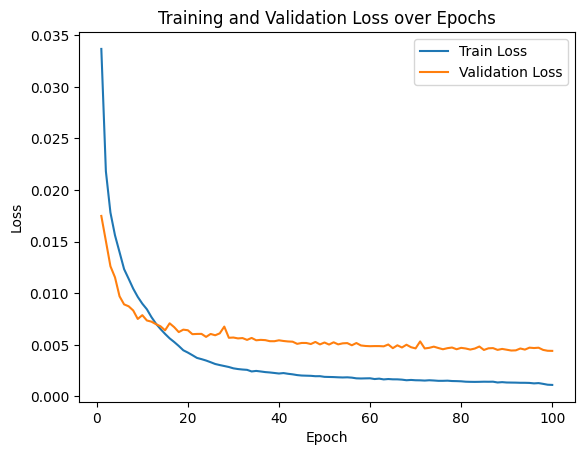

In [9]:
df = pd.read_csv(r'trained_models\training_results_02_15_01_2025.csv')
df.plot(x='epoch', y=['train_loss', 'val_loss'], kind='line')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [10]:
lowest_val_loss = df.min().iloc[2]
lowest_val_loss_epoch = df.idxmin().iloc[2]
print(f"The lowest validation loss was: {lowest_val_loss:.4f} at epoch {lowest_val_loss_epoch}")

The lowest validation loss was: 0.0044 at epoch 99


## Inference Examples

![Inference 1](trained_models\inference_1.png)
![Inference 2](trained_models\inference_2.png)
![Inference 3](trained_models\inference_3.png)
![Inference 4](trained_models\inference_4.png)

# 4. Problem Solving and Solution Discussion

## Challenges Faced

### <u>Model Architecture Issues:</u>
In the beginning, we implemented a neural network architecture that included batch normalization layers. However, this configuration did not yield the desired results. The model struggled to accurately detect facial keypoints, indicating that the batch normalization might be hindering its performance.

### <u>Bounding Box Problems:</u>

During the training process, we encountered issues related to bounding boxes around faces. These bounding boxes were intended to help the model focus on facial regions but instead interfered with the accurate detection of keypoints. This interference reduced the model's effectiveness in localizing facial features precisely.

### <u>Data Pipeline Challenges:</u>

As to not overcomplicate the training, we removed all images that had multiple faces annotated, and also images that did not have all four desired keypoints annotated. Otherwise it could have overcomplicated the training and the network, as we need to annotate non visible keypoints and maybe add a visibility parameter. 

### <u>Preprocessing Challenges:</u>
The preprocessing steps, which included data cleaning, normalization, and augmentation, were highly CPU-intensive when performed during training. This caused significant delays and inefficiencies, slowing down the overall training process and making it difficult to iterate quickly on model improvements.

## Solutions Implemented

### <u>Removing Batch Normalization:</u>
To address the poor performance caused by batch normalization, we decided to remove the batch normalization layers from our neural network architecture. This modification led to more stable training and improved accuracy in keypoint detection, as the model could now learn more effectively without the constraints imposed by batch normalization.

### <u>Eliminating Bounding Boxes:</u>
Recognizing that bounding boxes were causing more harm than good, we removed them from our data processing pipeline. Without the bounding boxes, the model was better able to focus solely on detecting keypoints, resulting in enhanced precision and reliability in locating facial features.

### <u>Refining the Data Pipeline:</u>
We took several steps to clean and refine our dataset:

- Removing Incomplete Annotations: We excluded all images that did not have all four of the desired keypoints. This filtering reduced our dataset from 16,000 to 12,000 images, ensuring that each training sample provided complete information for accurate keypoint detection.

- Excluding Multiple Faces: To avoid confusion and ensure that each image contained only a single face, we removed images featuring multiple faces. This further streamlined our dataset, allowing the model to focus on learning keypoints from clear and unambiguous facial images.

### <u>Optimizing Preprocessing Workflow:</u>
To overcome the CPU-intensive preprocessing challenges, we shifted all preprocessing tasks to be completed before the training phase. By preprocessing the entire dataset in advance, we significantly reduced the computational load during training. This approach led to faster and more efficient training iterations, enabling us to train the model more quickly and iterate on improvements without being bottlenecked by preprocessing delays.

By implementing these solutions, we overcame the initial challenges and significantly improved the performance of our facial keypoint detection model. The removal of batch normalization and bounding boxes, combined with a cleaner and more consistent dataset and an optimized preprocessing workflow, contributed to a more accurate and reliable model capable of performing well.